In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


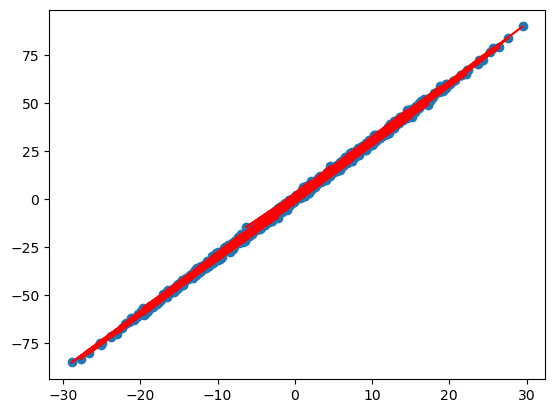

In [42]:
def dataGenarateDataSet(m=50):
    m = 1000
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    y = 3*X+noise
    return X,y

X , y = dataGenarateDataSet()

def plotData(X , y , color = 'orange' , title = "Data"):
    plt.scatter(X,y)
    plt.plot(X,y , color = 'red')
    plt.show()
plotData(X,y)

In [32]:
def dataNormalization(X):
    return (X-X.mean())/X.std()

X = dataNormalization(X)

def trainTestSplit(X , y ,split =0.8):
    m = .shape[0]
    data = np.zeros((m,2))
    data[: , 0] = X 
    data[:, 1] = y
    np.random.shuffle(data)
    split = int(m*split)

    XT = data[:split ,0]
    yT = data[:split ,1]
    Xt = data[split: ,0]
    yt = data[split: ,1]

    return XT , yT , Xt, yt

XT , yT , Xt ,yt =  trainTestSplit(X , y ,split =0.8)
    

In [33]:
def hypothesis(X, theta ):
    return theta[0] + theta[1]*X

In [34]:
def errorFunction(X ,y , theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_p = hypothesis(X[i] ,theta)
        e = e + (y[i] - y_p)**2 
    e = e/(2*m)
    return e

In [35]:
def gradient(X ,y , theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        exp = hypothesis(X[i] ,theta)-y[i]
        grad[0] += exp
        grad[1] += (exp)*X[i]
    return grad/m

[ 0.70486729 30.05922302]


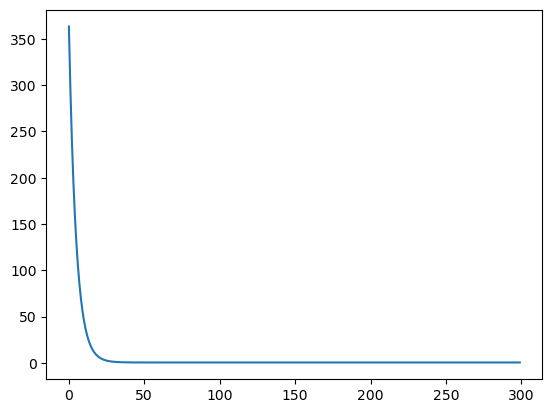

In [36]:
def train(X, y, learningRate =0.1):
    theta = np.zeros((2,))
    maxItrs = 300
    error_list=[]
    for i in range(maxItrs):
        grad = gradient(X ,y ,theta)
        theta[0] = theta[0] - (learningRate *grad[0])
        theta[1] = theta[1] - (learningRate *grad[1])
        error_list.append(errorFunction(X, y, theta))

    plt.plot(error_list)
    return theta

theta = train(XT,yT)
print(theta)

In [37]:
def predict(X ,theta):
    return hypothesis(X ,theta)

print(Xt , predict(Xt,yt))

[-4.52021782e-01  1.47354805e-01 -3.94425878e-01 -2.13783310e-01
 -1.63950624e+00 -6.32510951e-01 -1.08012763e-01 -2.63794388e+00
  2.94603879e-01 -1.91690940e-01  1.39036670e+00 -2.13039227e+00
 -2.90452706e-01  1.01440868e+00 -4.85911916e-02 -1.15745018e+00
 -1.70183676e+00  4.27155751e-02  8.16651544e-02 -1.68659412e+00
  9.28565658e-01 -7.52171520e-02 -1.82225792e+00 -1.73288122e+00
  3.55003346e-01 -1.74033994e+00 -2.32646454e+00 -1.34691857e+00
 -7.08273014e-01  5.15468877e-01  1.47500300e-01 -8.39021815e-02
  2.88705149e-01 -5.27603208e-01  2.18741366e-02  1.35014412e+00
  9.74226669e-01 -4.18784313e-03  2.08557609e-03  6.66833287e-01
  1.38993695e+00  2.51214944e-01 -3.53590366e-01  4.04313080e-01
 -2.33248186e-01  1.34066911e+00  1.94011614e-02  7.68425950e-01
 -2.38338395e-01  1.51764571e+00  2.82724995e-01 -3.27664812e-01
  3.88988325e-01  1.33610436e-01 -1.94477162e-01  6.47725814e-01
  3.86777187e-01 -2.02057596e+00 -2.79567385e-01  5.13385300e-01
  4.30668264e-01  1.47930

In [38]:
def r2Score(y , yp):
    ymean = y.mean()
    numin = np.sum((y -yp)**2)
    denom = np.sum((y -ymean)**2)

    return 1-(numin/denom)

print(r2Score(yt, hypothesis(Xt,theta)))
print(r2Score(yT, hypothesis(XT,theta)))

0.9988251025998112
0.9988026732785694
